# Chap 05-1. 결정 트리

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
from sklearn.model_selection import train_test_split
data = wine[['alcohol','sugar','pH']].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, wine['class'], test_size=0.2, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

----

In [8]:
# 잠시 개인 질문
# train_input으로 StandardScaler를 사용하면 train_input의 min/max로 fit을 시킬텐데,
# 그걸로 train_input을 transform 시키는건 이해되는데,
# test_input을 transform 하게 되면 어떻게 되나?
# test_input의 min/max가 train_input의 min/max보다 클 수 있는데...상관없어 보이기도 하고
#
# 한 번 확인해보자
import numpy as np
print(np.min(train_input), np.max(train_input))
print(np.min(train_scaled), np.max(train_scaled))
print(np.min(test_input), np.max(test_input))
print(np.min(test_scaled), np.max(test_scaled))

0.6 65.8
-2.988212911038643 12.578566840374403
0.7 26.05
-3.1135164321717017 4.968560680910572


In [9]:
# 잘못 이해했다. 이건 MinMaxScaler()가 아니므로 관련이 없다.
# MinMaxScaler()로 다시 확인해 보자
from sklearn.model_selection import train_test_split
data = wine[['alcohol','sugar','pH']].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, wine['class'], test_size=0.2, random_state=42)
print(np.min(train_input), np.max(train_input))
print(np.min(test_input), np.max(test_input))
print('---------------------------------------------')

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train_input)
train_scaled = mm.transform(train_input)
test_scaled = mm.transform(test_input)
print(np.min(train_scaled), np.max(train_scaled))
print(np.min(test_scaled), np.max(test_scaled))

0.6 65.8
0.7 26.05
---------------------------------------------
0.0 1.0
-0.015748031496062964 1.112903225806452


In [10]:
# 아니 MinMaxScaler()로 transform()을 했는데 음수값과 1보다 큰 값이 나오다니!!!
# 아이고...ChatGPT에게 물어보니 ndarray에 대해 내가 실수한게 있다
# 답변은 아래와 같다
# → MinMaxScaler는 각 feature별로 독립적으로 변환되므로, 특정 feature에서 train_input의 최소값보다 작은 값이 존재하면 변환 후 음수값이 나올 수 있음.
# Min/Max 값을 확인할 때, 각 feature별 확인한게 아니라 전체를 확인해서 그렇다.
# np.min(), np.max()를 사용할 때, 뒤에 axis=0 조건을 추가해야 feature별 값 확인이 가능하다
# 각 feature 별 다시 확인해 보면,
# - alcohol은 최대값을 넘어갔고
# - pH는 최소값보다 작은게 있어서 전체적으로 그렇게 나타난 것이다
from sklearn.model_selection import train_test_split
data = wine[['alcohol','sugar','pH']].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, wine['class'], test_size=0.2, random_state=42)
print(np.min(train_input, axis=0), np.max(train_input, axis=0))
print(np.min(test_input, axis=0), np.max(test_input, axis=0))
print('---------------------------------------------')

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train_input)
train_scaled = mm.transform(train_input)
test_scaled = mm.transform(test_input)
print(np.min(train_scaled, axis=0), np.max(train_scaled, axis=0))
print(np.min(test_scaled, axis=0), np.max(test_scaled, axis=0))

# 개인 호기심 끝!!!


# 아래 코드 이어서 수행할거면 다시 fit 시키자
from sklearn.model_selection import train_test_split
data = wine[['alcohol','sugar','pH']].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, wine['class'], test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

[8.   0.6  2.74] [14.2  65.8   4.01]
[8.4  0.7  2.72] [14.9  26.05  4.01]
---------------------------------------------
[0. 0. 0.] [1. 1. 1.]
[ 0.06451613  0.00153374 -0.01574803] [1.11290323 0.39033742 1.        ]


----

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


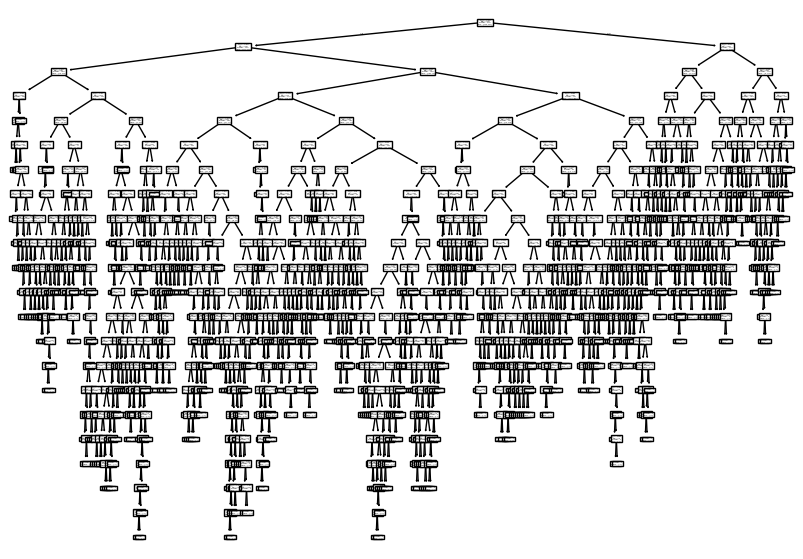

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

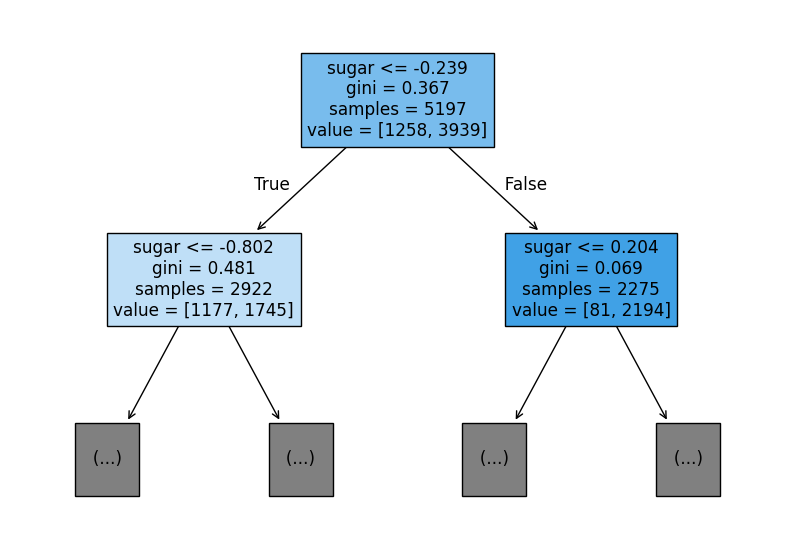

In [15]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

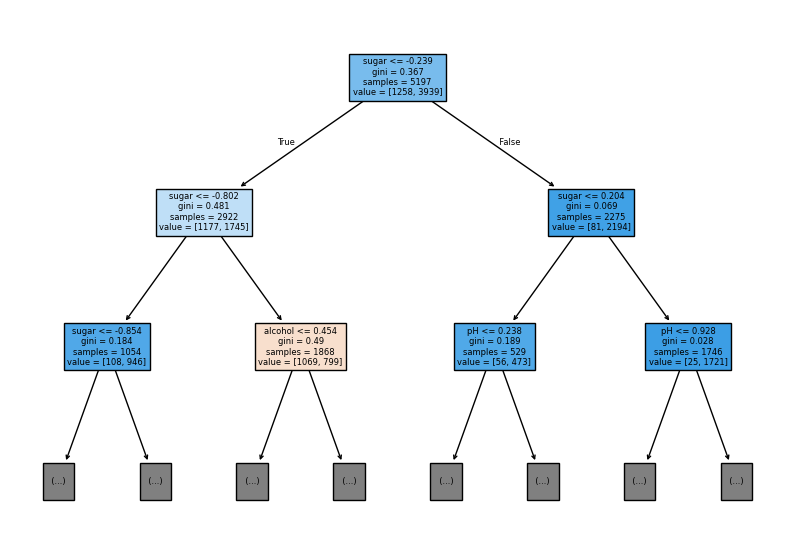

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [17]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


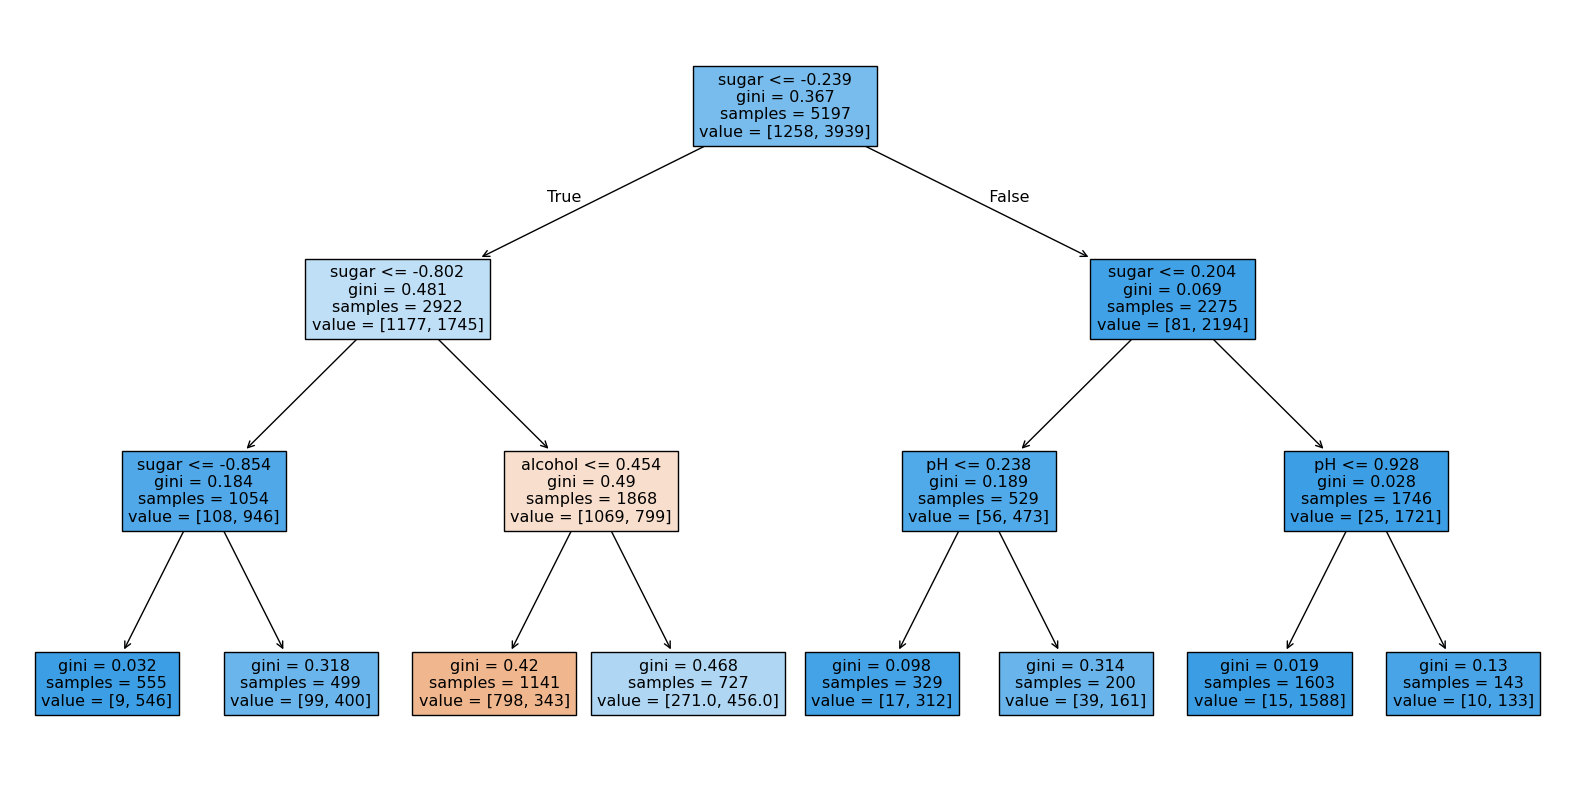

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


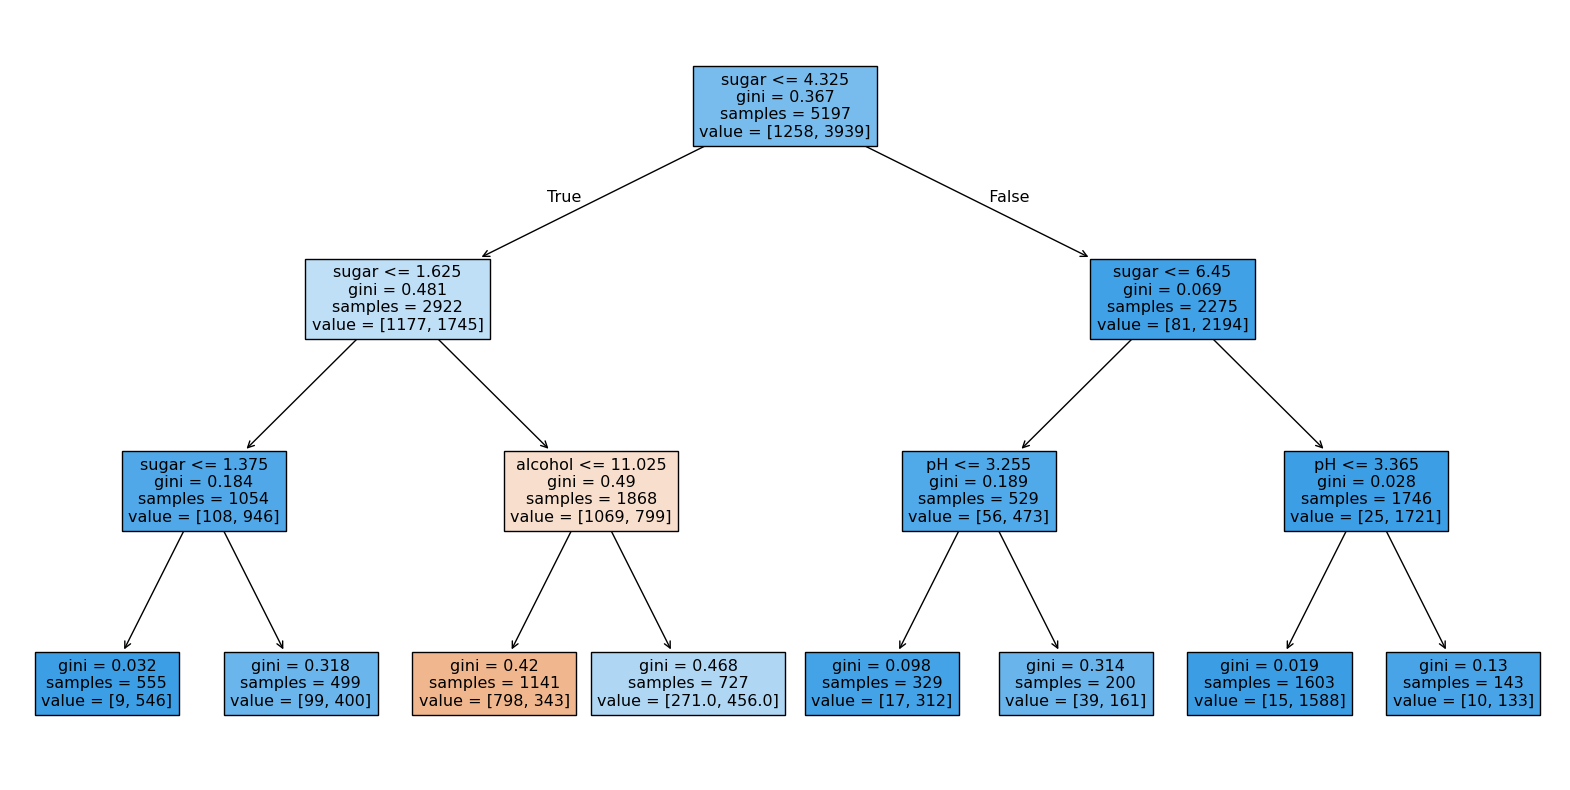

In [20]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [21]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# Chap 05-2. 교차 검증과 그리드 서치

In [22]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [23]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [25]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [26]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [28]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00861692, 0.00822949, 0.00884342, 0.00843143, 0.00797296]), 'score_time': array([0.00125122, 0.00126338, 0.00132322, 0.0012207 , 0.00119829]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [29]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [30]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [31]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [32]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [33]:
%%time
gs.fit(train_input, train_target)

CPU times: user 105 ms, sys: 58.1 ms, total: 163 ms
Wall time: 3.17 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [34]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [35]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [36]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [37]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [38]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(2, 100, 10)
          }

In [39]:
%%time
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

CPU times: user 351 ms, sys: 31.2 ms, total: 382 ms
Wall time: 4.78 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001]),
                         'min_samples_split': range(2, 100, 10)})

In [40]:
print(gs.best_params_)

{'max_depth': 19, 'min_impurity_decrease': np.float64(0.0001), 'min_samples_split': 2}


In [41]:
print(np.max(gs.cv_results_['mean_test_score']))

0.86780780336122


In [42]:
from scipy.stats import uniform, randint

In [43]:
rgen = randint(0, 10)
rgen.rvs(10)

array([4, 0, 9, 7, 5, 8, 6, 6, 4, 9])

In [44]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([107, 102, 100,  94, 104,  81, 117, 104, 113,  78]))

In [45]:
%%time
np.unique(rgen.rvs(100000), return_counts=True)

CPU times: user 2.91 ms, sys: 943 µs, total: 3.86 ms
Wall time: 6.26 ms


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 9987, 10048, 10020, 10056,  9854,  9907,  9979, 10029,  9930,
        10190]))

In [46]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.03533686, 0.76923194, 0.59690259, 0.68317747, 0.46341458,
       0.12556519, 0.37614574, 0.18629419, 0.94705629, 0.76829578])

In [47]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25),
          }

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

CPU times: user 289 ms, sys: 15 ms, total: 304 ms
Wall time: 2.64 s


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df55b2ecad0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7df55b2a0e90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df55b2eca50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7df55b2ee0d0>},
                   random_state=42)

In [49]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [50]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [51]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


# Chap 05-3. 트리의 앙상블

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [53]:
%%time
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809
CPU times: user 152 ms, sys: 15.8 ms, total: 168 ms
Wall time: 2.32 s


In [54]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [55]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [58]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506
CPU times: user 34.8 ms, sys: 6.08 ms, total: 40.9 ms
Wall time: 2.71 s


In [59]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [61]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015
CPU times: user 36 ms, sys: 6.45 ms, total: 42.4 ms
Wall time: 2.9 s


In [62]:
%%time
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999
CPU times: user 85.4 ms, sys: 23.2 ms, total: 109 ms
Wall time: 10.5 s


In [63]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


In [64]:
%%time
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236
CPU times: user 1.99 s, sys: 66.6 ms, total: 2.06 s
Wall time: 2.24 s


In [65]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [67]:
%%time
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]
CPU times: user 114 ms, sys: 5.18 ms, total: 120 ms
Wall time: 662 ms


In [68]:
hgb.score(test_input, test_target)

0.8723076923076923

In [69]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686
CPU times: user 23.3 ms, sys: 1.19 ms, total: 24.5 ms
Wall time: 676 ms


In [72]:
%%time
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
CPU times: user 73.4 ms, sys: 5.8 ms, total: 79.2 ms
Wall time: 6.55 s
